In [35]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'YOUR-API-KEY',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-28T07:40:28.233Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 10049}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11071, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [36]:
type(data)

dict

In [37]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [38]:
# Create dataframe from raw json data

df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")

# # Create csv file to store data
# import csv

# headers = list(df)
# with open("CoinPrice.csv", "w", newline = "") as f:
#     writer = csv.writer(f)
#     writer.writerow(headers)
#     f.close()

In [39]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11071,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970453e+07,1.970453e+07,False,NaN,1,NaN,NaN,None,2024-05-28T07:38:00.000Z,67696.787139,2.977236e+10,60.0506,-0.189988,-1.177036,-4.640504,5.900877,-3.347546,17.425451,1.333933e+12,52.3961,1.421633e+12,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
1,1027,Ethereum,ETH,ethereum,8998,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201376e+08,1.201376e+08,True,NaN,2,NaN,NaN,None,2024-05-28T07:37:00.000Z,3842.794476,1.826839e+10,1.3001,-0.241137,-1.532440,4.659967,15.754383,8.164890,17.425324,4.616642e+11,18.1347,4.616642e+11,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
2,825,Tether USDt,USDT,tether,86571,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.119653e+11,1.150866e+11,True,NaN,3,NaN,NaN,None,2024-05-28T07:37:00.000Z,0.999311,7.034909e+10,35.7238,0.019850,-0.004963,-0.051606,-0.005722,-0.095412,-0.124543,1.118882e+11,4.3951,1.150072e+11,None,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-28 16:40:07.180551
3,1839,BNB,BNB,bnb,2169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475856e+08,1.475856e+08,False,NaN,4,NaN,NaN,None,2024-05-28T07:37:00.000Z,596.951599,1.816717e+09,24.2410,-0.193945,-0.942453,-4.176686,-0.653531,-1.790306,49.646355,8.810146e+10,3.4603,8.810146e+10,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
4,5426,Solana,SOL,solana,664,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.495153e+08,5.769492e+08,True,NaN,5,NaN,NaN,None,2024-05-28T07:37:00.000Z,166.176568,2.978027e+09,8.5134,-0.101572,1.172669,-7.958510,15.531159,-10.305511,52.333159,7.469891e+10,2.9340,9.587543e+10,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
5,3408,USDC,USDC,usd-coin,19435,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.250874e+10,3.250874e+10,False,NaN,6,NaN,NaN,None,2024-05-28T07:37:00.000Z,1.000076,6.376269e+09,39.3808,0.020274,0.011658,0.020537,0.007793,-0.001605,0.016355,3.251120e+10,1.2769,3.251120e+10,None,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-28 16:40:07.180551
6,52,XRP,XRP,xrp,1324,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.543048e+10,9.998759e+10,False,NaN,7,NaN,NaN,None,2024-05-28T07:38:00.000Z,0.524004,1.132234e+09,55.6624,0.030270,-0.361592,-2.876988,0.046684,-14.945558,-9.599069,2.904579e+10,1.1407,5.240040e+10,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
7,74,Dogecoin,DOGE,dogecoin,972,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.444731e+11,1.444731e+11,True,NaN,8,NaN,NaN,None,2024-05-28T07:38:00.000Z,0.164172,1.551227e+09,44.5326,-0.368545,-0.687655,0.783655,9.306987,-23.292119,70.666318,2.371846e+10,0.9316,2.371846e+10,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
8,11419,Toncoin,TON,toncoin,375,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474740e+09

In [40]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e3c51909-132c-4b86-ba2d-98a559ed5a2e',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data["data"])
    df2["timestamp"] = pd.to_datetime("now")
    # with open("CoinPrice.csv", "a+") as f:
    #     df2.to_csv("CoinPrice.csv", mode = "a", index = False, header = False)

    # Create CSV file to store values
    import os
    if not os.path.exists(r"C:\Users\Kha Vu\Jupyter_Note\CoinPrice.csv"):
        df2.to_csv("CoinPrice.csv", header = "column_names")
    else:
        df2.to_csv("CoinPrice.csv", mode = "a", index = False, header = False)

In [41]:
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print("Ran")
    sleep(10)

Ran
Ran
Ran
Ran
Ran


In [42]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11071,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970453e+07,1.970453e+07,False,NaN,1,NaN,NaN,None,2024-05-28T07:38:00.000Z,67696.787139,2.977236e+10,60.0506,-0.189988,-1.177036,-4.640504,5.900877,-3.347546,17.425451,1.333933e+12,52.3961,1.421633e+12,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
1,1027,Ethereum,ETH,ethereum,8998,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201376e+08,1.201376e+08,True,NaN,2,NaN,NaN,None,2024-05-28T07:37:00.000Z,3842.794476,1.826839e+10,1.3001,-0.241137,-1.532440,4.659967,15.754383,8.164890,17.425324,4.616642e+11,18.1347,4.616642e+11,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
2,825,Tether USDt,USDT,tether,86571,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.119653e+11,1.150866e+11,True,NaN,3,NaN,NaN,None,2024-05-28T07:37:00.000Z,0.999311,7.034909e+10,35.7238,0.019850,-0.004963,-0.051606,-0.005722,-0.095412,-0.124543,1.118882e+11,4.3951,1.150072e+11,None,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-28 16:40:07.180551
3,1839,BNB,BNB,bnb,2169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475856e+08,1.475856e+08,False,NaN,4,NaN,NaN,None,2024-05-28T07:37:00.000Z,596.951599,1.816717e+09,24.2410,-0.193945,-0.942453,-4.176686,-0.653531,-1.790306,49.646355,8.810146e+10,3.4603,8.810146e+10,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
4,5426,Solana,SOL,solana,664,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.495153e+08,5.769492e+08,True,NaN,5,NaN,NaN,None,2024-05-28T07:37:00.000Z,166.176568,2.978027e+09,8.5134,-0.101572,1.172669,-7.958510,15.531159,-10.305511,52.333159,7.469891e+10,2.9340,9.587543e+10,None,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
5,3408,USDC,USDC,usd-coin,19435,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.250874e+10,3.250874e+10,False,NaN,6,NaN,NaN,None,2024-05-28T07:37:00.000Z,1.000076,6.376269e+09,39.3808,0.020274,0.011658,0.020537,0.007793,-0.001605,0.016355,3.251120e+10,1.2769,3.251120e+10,None,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-28 16:40:07.180551
6,52,XRP,XRP,xrp,1324,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.543048e+10,9.998759e+10,False,NaN,7,NaN,NaN,None,2024-05-28T07:38:00.000Z,0.524004,1.132234e+09,55.6624,0.030270,-0.361592,-2.876988,0.046684,-14.945558,-9.599069,2.904579e+10,1.1407,5.240040e+10,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
7,74,Dogecoin,DOGE,dogecoin,972,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.444731e+11,1.444731e+11,True,NaN,8,NaN,NaN,None,2024-05-28T07:38:00.000Z,0.164172,1.551227e+09,44.5326,-0.368545,-0.687655,0.783655,9.306987,-23.292119,70.666318,2.371846e+10,0.9316,2.371846e+10,None,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.180551
8,11419,Toncoin,TON,toncoin,375,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474740e+09

In [44]:
dfnew = pd.read_csv("CoinPrice.csv")
dfnew

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11071,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.970453e+07,1.970453e+07,False,NaN,1,NaN,NaN,NaN,2024-05-28T07:38:00.000Z,67696.787139,2.977236e+10,60.0506,-0.189988,-1.177036,-4.640504,5.900877,-3.347546,17.425451,1.333933e+12,52.3961,1.421633e+12,NaN,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
1,1027,Ethereum,ETH,ethereum,8998,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201376e+08,1.201376e+08,True,NaN,2,NaN,NaN,NaN,2024-05-28T07:37:00.000Z,3842.794476,1.826839e+10,1.3001,-0.241137,-1.532440,4.659967,15.754383,8.164890,17.425324,4.616642e+11,18.1347,4.616642e+11,NaN,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
2,825,Tether USDt,USDT,tether,86571,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.119653e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-28T07:37:00.000Z,0.999311,7.034909e+10,35.7238,0.019850,-0.004963,-0.051606,-0.005722,-0.095412,-0.124543,1.118882e+11,4.3951,1.150072e+11,NaN,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-28 16:40:07.848688
3,1839,BNB,BNB,bnb,2169,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475856e+08,1.475856e+08,False,NaN,4,NaN,NaN,NaN,2024-05-28T07:37:00.000Z,596.951599,1.816717e+09,24.2410,-0.193945,-0.942453,-4.176686,-0.653531,-1.790306,49.646355,8.810146e+10,3.4603,8.810146e+10,NaN,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
4,5426,Solana,SOL,solana,664,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.495153e+08,5.769492e+08,True,NaN,5,NaN,NaN,NaN,2024-05-28T07:37:00.000Z,166.176568,2.978027e+09,8.5134,-0.101572,1.172669,-7.958510,15.531159,-10.305511,52.333159,7.469891e+10,2.9340,9.587543e+10,NaN,2024-05-28T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
5,3408,USDC,USDC,usd-coin,19435,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.250874e+10,3.250874e+10,False,NaN,6,NaN,NaN,NaN,2024-05-28T07:37:00.000Z,1.000076,6.376269e+09,39.3808,0.020274,0.011658,0.020537,0.007793,-0.001605,0.016355,3.251120e+10,1.2769,3.251120e+10,NaN,2024-05-28T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-28 16:40:07.848688
6,52,XRP,XRP,xrp,1324,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.543048e+10,9.998759e+10,False,NaN,7,NaN,NaN,NaN,2024-05-28T07:38:00.000Z,0.524004,1.132234e+09,55.6624,0.030270,-0.361592,-2.876988,0.046684,-14.945558,-9.599069,2.904579e+10,1.1407,5.240040e+10,NaN,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
7,74,Dogecoin,DOGE,dogecoin,972,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.444731e+11,1.444731e+11,True,NaN,8,NaN,NaN,NaN,2024-05-28T07:38:00.000Z,0.164172,1.551227e+09,44.5326,-0.368545,-0.687655,0.783655,9.306987,-23.292119,70.666318,2.371846e+10,0.9316,2.371846e+10,NaN,2024-05-28T07:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 16:40:07.848688
8,11419,Toncoin,TON,toncoin,375,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474740e+09,5.107036e+09,Tr

# Transforming data

In [49]:
pd.set_option("display.float_format", lambda x: "%.2f" % x) #set 2 num after decimal point

In [61]:
dfa = dfnew.groupby("name", sort = False)[['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']].mean()
dfa

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.19,-1.18,-4.64,5.90,-3.35,17.43
Ethereum,-0.24,-1.53,4.66,15.75,8.16,17.43
Tether USDt,0.02,-0.00,-0.05,-0.01,-0.10,-0.12
BNB,-0.19,-0.94,-4.18,-0.65,-1.79,49.65
Solana,-0.10,1.17,-7.96,15.53,-10.31,52.33
USDC,0.02,0.01,0.02,0.01,-0.00,0.02
XRP,0.03,-0.36,-2.88,0.05,-14.95,-9.60
Dogecoin,-0.37,-0.69,0.78,9.31,-23.29,70.67
Toncoin,0.49,-0.15,-4.50,13.65,30.86,190.98


In [54]:
list(dfnew)[20:26]

['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']

# Visualize using Seaborn

In [62]:
dfb = dfa.stack()
dfb

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.19
             quote.USD.percent_change_24h    -1.18
             quote.USD.percent_change_7d     -4.64
             quote.USD.percent_change_30d     5.90
             quote.USD.percent_change_60d    -3.35
             quote.USD.percent_change_90d    17.43
Ethereum     quote.USD.percent_change_1h     -0.24
             quote.USD.percent_change_24h    -1.53
             quote.USD.percent_change_7d      4.66
             quote.USD.percent_change_30d    15.75
             quote.USD.percent_change_60d     8.16
             quote.USD.percent_change_90d    17.43
Tether USDt  quote.USD.percent_change_1h      0.02
             quote.USD.percent_change_24h    -0.00
             quote.USD.percent_change_7d     -0.05
             quote.USD.percent_change_30d    -0.01
             quote.USD.percent_change_60d    -0.10
             quote.USD.percent_change_90d    -0.12
BNB          quote.USD.percent_change_1h

In [68]:
dfc = dfb.to_frame(name="values")

dfc = dfc.reset_index()
dfc

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19
1,Bitcoin,quote.USD.percent_change_24h,-1.18
2,Bitcoin,quote.USD.percent_change_7d,-4.64
3,Bitcoin,quote.USD.percent_change_30d,5.90
4,Bitcoin,quote.USD.percent_change_60d,-3.35
5,Bitcoin,quote.USD.percent_change_90d,17.43
6,Ethereum,quote.USD.percent_change_1h,-0.24
7,Ethereum,quote.USD.percent_change_24h,-1.53
8,Ethereum,quote.USD.percent_change_7d,4.66
9,Ethereum,quote.USD.percent_change_30d,15.75


In [71]:
dfc = dfc.rename(columns={"level_1": "percent_change"})
dfc["percent_change"] = dfc["percent_change"].str.lstrip("quote.USD.percent_change_")
dfc

,name,percent_change,values
0,Bitcoin,1h,-0.19
1,Bitcoin,24h,-1.18
2,Bitcoin,7d,-4.64
3,Bitcoin,30d,5.90
4,Bitcoin,60d,-3.35
5,Bitcoin,90d,17.43
6,Ethereum,1h,-0.24
7,Ethereum,24h,-1.53
8,Ethereum,7d,4.66
9,Ethereum,30d,15.75


In [70]:
import seaborn as sns
import matplotlib as plt

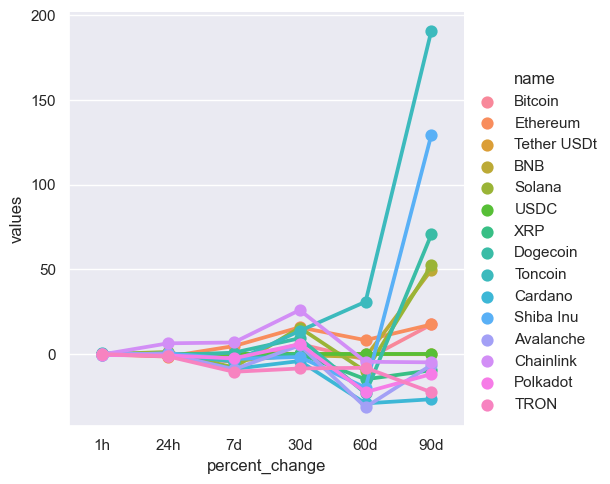

In [77]:
sns.set_theme(style="darkgrid")
sns.catplot(x = "percent_change", y = "values", hue = "name", data = dfc, kind = "point")

In [79]:
dfbit = dfnew[["name", "quote.USD.price", "timestamp"]].query("name == 'Bitcoin'")
dfbit

,name,quote.USD.price,timestamp
0,Bitcoin,67696.79,2024-05-28 16:40:07.848688
15,Bitcoin,67696.79,2024-05-28 16:40:18.837179
30,Bitcoin,67696.79,2024-05-28 16:40:29.378387
45,Bitcoin,67696.79,2024-05-28 16:40:39.934163
60,Bitcoin,67696.79,2024-05-28 16:40:50.496513


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

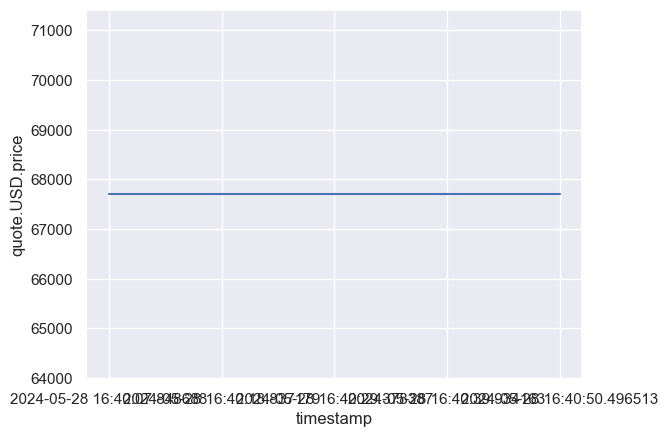

In [80]:
sns.lineplot(x = "timestamp", y = "quote.USD.price", data =dfbit)

# Visualize using matplotlib

In [102]:
dfmatplot = dfa.copy().transpose()
dfmatplot = dfmatplot.reset_index()
dfmatplot = dfmatplot.rename(columns={"index": "timeframe"})
dfmatplot["timeframe"] = dfmatplot["timeframe"].str.lstrip("quote.USD.percent_change_")
dfmatplot = dfmatplot.set_index("timeframe")
dfmatplot

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Polkadot,TRON
timeframe,,,,,,,,,,,,,,,
1h,-0.19,-0.24,0.02,-0.19,-0.10,0.02,0.03,-0.37,0.49,-0.08,-0.83,-0.03,-0.25,-0.62,-0.04
24h,-1.18,-1.53,-0.00,-0.94,1.17,0.01,-0.36,-0.69,-0.15,-0.52,0.48,0.05,6.30,-0.90,-1.42
7d,-4.64,4.66,-0.05,-4.18,-7.96,0.02,-2.88,0.78,-4.50,-8.84,-2.97,-9.10,6.81,-2.57,-10.51
30d,5.90,15.75,-0.01,-0.65,15.53,0.01,0.05,9.31,13.65,-4.16,-1.73,5.08,25.93,5.81,-8.56
60d,-3.35,8.16,-0.10,-1.79,-10.31,-0.00,-14.95,-23.29,30.86,-29.18,-19.90,-31.39,-4.59,-22.52,-8.14
90d,17.43,17.43,-0.12,49.65,52.33,0.02,-9.60,70.67,190.98,-26.72,129.59,-6.48,-4.93,-11.84,-22.59


<Axes: title={'center': 'Percent change by Crypto by days'}, xlabel='timeframe'>

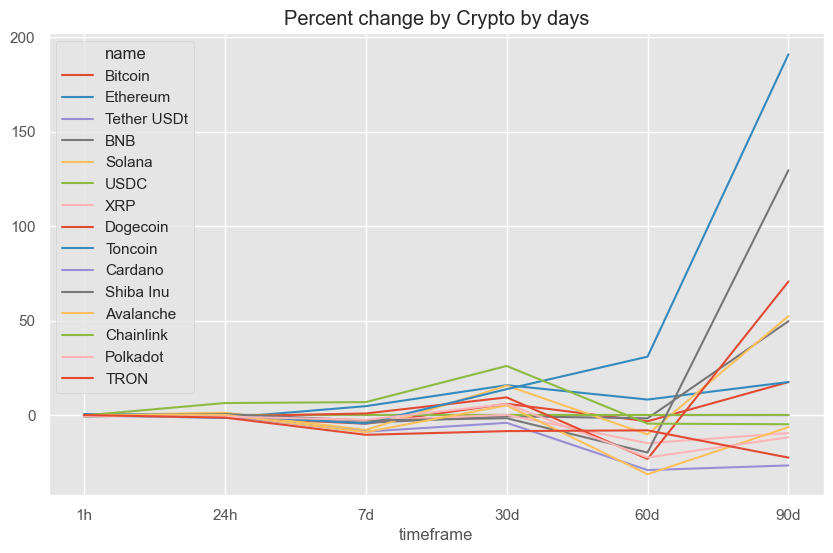

In [113]:
plt.style.use('ggplot')
dfmatplot.plot(figsize = (10,6), title = "Percent change by Crypto by days")